In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd

%config IPCompleter.greedy=True

In [2]:
#base original
base_acid_rf_20 = pd.read_csv('C:/Users/Samsung/TCC_ACID_RF/datatran2020.csv', sep = ';')

In [3]:
base_acid_rf_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63530 entries, 0 to 63529
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      63530 non-null  float64
 1   data_inversa            63530 non-null  object 
 2   dia_semana              63530 non-null  object 
 3   horario                 63530 non-null  object 
 4   uf                      63530 non-null  object 
 5   br                      63372 non-null  float64
 6   km                      63372 non-null  object 
 7   municipio               63530 non-null  object 
 8   causa_acidente          63530 non-null  object 
 9   tipo_acidente           63530 non-null  object 
 10  classificacao_acidente  63530 non-null  object 
 11  fase_dia                63530 non-null  object 
 12  sentido_via             63530 non-null  object 
 13  condicao_metereologica  63530 non-null  object 
 14  tipo_pista              63530 non-null

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
base_acid_rf_20.head(1000)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260031.0,2020-01-01,quarta,01:00:00,TO,153.0,"678,1",GURUPI,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Não,5,0,0,5,0,0,5,1,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN
1,260036.0,2020-01-01,quarta,01:00:00,RJ,116.0,178,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,2,1,0,0,1,0,0,1,"-22,75223028","-43,4379103",SR-RJ,DEL5/1,UOP02/RJ
2,260037.0,2020-01-01,quarta,01:52:00,SC,101.0,"206,9",SAO JOSE,Ingestão de Álcool,Colisão lateral,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Sim,2,0,1,0,1,0,1,2,"-27,59193546","-48,61824557",SR-SC,DEL8/1,UOP01/SC
3,260038.0,2020-01-01,quarta,01:15:00,RO,364.0,236,CACOAL,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Sim,1,0,0,1,0,0,1,1,"-11,44624577","-61,43761218",SR-RO,DEL21/2,UOP02/RO
4,260039.0,2020-01-01,quarta,01:30:00,PR,153.0,360,REBOUCAS,Ingestão de Álcool,Capotamento,Com Vítimas Feridas,Plena Noite,Crescente,Garoa/Chuvisco,Simples,Curva,Não,6,0,2,4,0,0,6,1,"-25,67503796","-50,75089805",SR-PR,DEL7/3,UOP04/PR
5,260040.0,2020-01-01,quarta,00:40:00,RO,319.0,64,PORTO VELHO,Ingestão de Álcool,Colisão transversal,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,2,0,0,0,2,0,0,2,"-8,76751908","-63,88427496",SR-RO,DEL21/1,UOP01/RO
6,260041.0,2020-01-01,quarta,02:20:00,SC,101.0,"89,9",BARRA VELHA,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,Plena Noite,Crescente,Garoa/Chuvisco,Dupla,Reta,Sim,1,0,0,0,1,0,0,1,"-26,66327987","-48,68898153",SR-SC,DEL8/3,UOP02/SC
7,260042.0,2020-01-01,quarta,02:15:00,PR,369.0,155,LONDRINA,Desobediência às normas de trânsito pelo condutor,Colisão transversal,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Não Informado,Sim,3,0,1,0,2,0,1,2,"-23,29286194","-51,16154861",SR-PR,DEL7/7,UOP01/PR
8,260043.0,2020-01-01,quarta,02:30:00,AL,104.0,37,UNIAO DOS PALMARES,Animais na Pista,Atropelamento de Animal,Com Vítimas Fatais,Plena Noite,Decrescente,Nublado,Simples,Reta,Não,1,1,0,0,0,0,0,1,"-9,17491283","-36,02935415",SR-AL,DEL13/1,UOP02/AL
9,260044.0,2020-01-01,quarta,00:20:00,RS,290.0,97,PORTO ALEGRE,Falta de Atenção à Condução,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,2,0,2,0,0,0,2,1,"-29,997789","-51,20779",SR-RS,DEL9/1,UOP01/RS


In [37]:
#selecionando colunas desejadas
base_selecionados = pd.read_csv('C:/Users/Samsung/TCC_ACID_RF/datatran2020.csv', 
                                usecols=['id', 'data_inversa', 'dia_semana', 'uf', 'br', 'km', 'municipio', 
                                        'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 
                                        'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'latitude', 
                                        'longitude', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 
                                         'feridos', 'veiculos'], sep = ';')

In [9]:
#base_selecionados.dtypes
base_selecionados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63530 entries, 0 to 63529
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      63530 non-null  float64
 1   data_inversa            63530 non-null  object 
 2   dia_semana              63530 non-null  object 
 3   uf                      63530 non-null  object 
 4   br                      63372 non-null  float64
 5   km                      63372 non-null  object 
 6   municipio               63530 non-null  object 
 7   causa_acidente          63530 non-null  object 
 8   tipo_acidente           63530 non-null  object 
 9   classificacao_acidente  63530 non-null  object 
 10  fase_dia                63530 non-null  object 
 11  condicao_metereologica  63530 non-null  object 
 12  tipo_pista              63530 non-null  object 
 13  tracado_via             63530 non-null  object 
 14  uso_solo                63530 non-null

In [10]:
#Não existe registros duplicados
base_selecionados.drop_duplicates()
base_selecionados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63530 entries, 0 to 63529
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      63530 non-null  float64
 1   data_inversa            63530 non-null  object 
 2   dia_semana              63530 non-null  object 
 3   uf                      63530 non-null  object 
 4   br                      63372 non-null  float64
 5   km                      63372 non-null  object 
 6   municipio               63530 non-null  object 
 7   causa_acidente          63530 non-null  object 
 8   tipo_acidente           63530 non-null  object 
 9   classificacao_acidente  63530 non-null  object 
 10  fase_dia                63530 non-null  object 
 11  condicao_metereologica  63530 non-null  object 
 12  tipo_pista              63530 non-null  object 
 13  tracado_via             63530 non-null  object 
 14  uso_solo                63530 non-null

In [74]:
total_mortos = base_selecionados['mortos'].sum()
total_mortos

5289

In [21]:
#Tratar os dados
from datetime import datetime

#Converter o campo "id" para inteiro e "data_inversa" para data
base_selecionados['id'] = base_selecionados['id'].astype(np.int64)
#Para converter o campo "br" para inteiro, antes tive q tratar os valores nulos (NaN)
#base_selecionados['br'] = base_selecionados['br'].astype(np.int64)
base_selecionados['data_inversa'] = pd.to_datetime(base_selecionados['data_inversa'])


#Reforçando os campos não numéricos como string
base_selecionados['dia_semana'] = base_selecionados['dia_semana'].astype(str)
base_selecionados['uf'] = base_selecionados['uf'].astype(str)
#base_selecionados['km'] = base_selecionados['km'].astype(str)
base_selecionados['municipio'] = base_selecionados['municipio'].astype(str)
base_selecionados['causa_acidente'] = base_selecionados['causa_acidente'].astype(str)
base_selecionados['tipo_acidente'] = base_selecionados['tipo_acidente'].astype(str)
base_selecionados['classificacao_acidente'] = base_selecionados['classificacao_acidente'].astype(str)
base_selecionados['fase_dia'] = base_selecionados['fase_dia'].astype(str)
base_selecionados['condicao_metereologica'] = base_selecionados['condicao_metereologica'].astype(str)
base_selecionados['tipo_pista'] = base_selecionados['tipo_pista'].astype(str)
base_selecionados['tracado_via'] = base_selecionados['tracado_via'].astype(str)
base_selecionados['uso_solo'] = base_selecionados['uso_solo'].astype(str)
base_selecionados['latitude'] = base_selecionados['latitude'].astype(str)
base_selecionados['longitude'] = base_selecionados['longitude'].astype(str)

base_selecionados.dtypes
#base_selecionados.info()

id                                 int64
data_inversa              datetime64[ns]
dia_semana                        object
uf                                object
br                               float64
km                                object
municipio                         object
causa_acidente                    object
tipo_acidente                     object
classificacao_acidente            object
fase_dia                          object
condicao_metereologica            object
tipo_pista                        object
tracado_via                       object
uso_solo                          object
pessoas                            int64
mortos                             int64
feridos_leves                      int64
feridos_graves                     int64
ilesos                             int64
feridos                            int64
veiculos                           int64
latitude                          object
longitude                         object
dtype: object

In [22]:
base_selecionados.head(100)


,id,data_inversa,dia_semana,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,feridos,veiculos,latitude,longitude
0,260031,2020-01-01,quarta,TO,153.0,"678,1",GURUPI,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Plena Noite,Nublado,Simples,Reta,Não,5,0,0,5,0,5,1,"-11,77460203","-49,10744996"
1,260036,2020-01-01,quarta,RJ,116.0,178,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Céu Claro,Dupla,Reta,Sim,2,1,0,0,1,0,1,"-22,75223028","-43,4379103"
2,260037,2020-01-01,quarta,SC,101.0,"206,9",SAO JOSE,Ingestão de Álcool,Colisão lateral,Com Vítimas Feridas,Plena Noite,Nublado,Simples,Reta,Sim,2,0,1,0,1,1,2,"-27,59193546","-48,61824557"
3,260038,2020-01-01,quarta,RO,364.0,236,CACOAL,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Nublado,Simples,Reta,Sim,1,0,0,1,0,1,1,"-11,44624577","-61,43761218"
4,260039,2020-01-01,quarta,PR,153.0,360,REBOUCAS,Ingestão de Álcool,Capotamento,Com Vítimas Feridas,Plena Noite,Garoa/Chuvisco,Simples,Curva,Não,6,0,2,4,0,6,1,"-25,67503796","-50,75089805"
5,260040,2020-01-01,quarta,RO,319.0,64,PORTO VELHO,Ingestão de Álcool,Colisão transversal,Sem Vítimas,Plena Noite,Céu Claro,Dupla,Reta,Sim,2,0,0,0,2,0,2,"-8,76751908","-63,88427496"
6,260041,2020-01-01,quarta,SC,101.0,"89,9",BARRA VELHA,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,Plena Noite,Garoa/Chuvisco,Dupla,Reta,Sim,1,0,0,0,1,0,1,"-26,66327987","-48,68898153"
7,260042,2020-01-01,quarta,PR,369.0,155,LONDRINA,Desobediência às normas de trânsito pelo condutor,Colisão transversal,Com Vítimas Feridas,Plena Noite,Céu Claro,Múltipla,Não Informado,Sim,3,0,1,0,2,1,2,"-23,29286194","-51,16154861"
8,260043,2020-01-01,quarta,AL,104.0,37,UNIAO DOS PALMARES,Animais na Pista,Atropelamento de Animal,Com Vítimas Fatais,Plena Noite,Nublado,Simples,Reta,Não,1,1,0,0,0,0,1,"-9,17491283","-36,02935415"
9,260044,2020-01-01,quarta,RS,290.0,97,PORTO ALEGRE,Falta de Atenção à Condução,Tombamento,Com Vítimas Feridas,Plena Noite,Céu Claro,Dupla,Reta,Não,2,0,2,0,0,2,1,"-29,997789","-51,20779"


In [38]:
#indexar base (pelo id)
base_selecionados = base_selecionados.set_index('id')

In [24]:
#valores únicos
#result = result.sort_values(by='uf', ascending=True)
#base_selecionados[base_selecionados['municipio'] == 'CACOAL'].count()
#causa_acidente = base_selecionados['km'].unique()
#causa_acidente = causa_acidente.sort_values(by='km', ascending=True)
base_selecionados[base_selecionados['km'] == '000']

,data_inversa,dia_semana,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,feridos,veiculos,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,,,,


In [39]:
#valores nulos
base_selecionados.isnull().sum()

data_inversa                0
dia_semana                  0
uf                          0
br                        158
km                        158
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
dtype: int64

In [26]:
#Percentual dos campos nulos
base_selecionados.isna().mean()

data_inversa              0.000000
dia_semana                0.000000
uf                        0.000000
br                        0.002487
km                        0.002487
municipio                 0.000000
causa_acidente            0.000000
tipo_acidente             0.000000
classificacao_acidente    0.000000
fase_dia                  0.000000
condicao_metereologica    0.000000
tipo_pista                0.000000
tracado_via               0.000000
uso_solo                  0.000000
pessoas                   0.000000
mortos                    0.000000
feridos_leves             0.000000
feridos_graves            0.000000
ilesos                    0.000000
feridos                   0.000000
veiculos                  0.000000
latitude                  0.000000
longitude                 0.000000
dtype: float64

<AxesSubplot:xlabel='uf'>

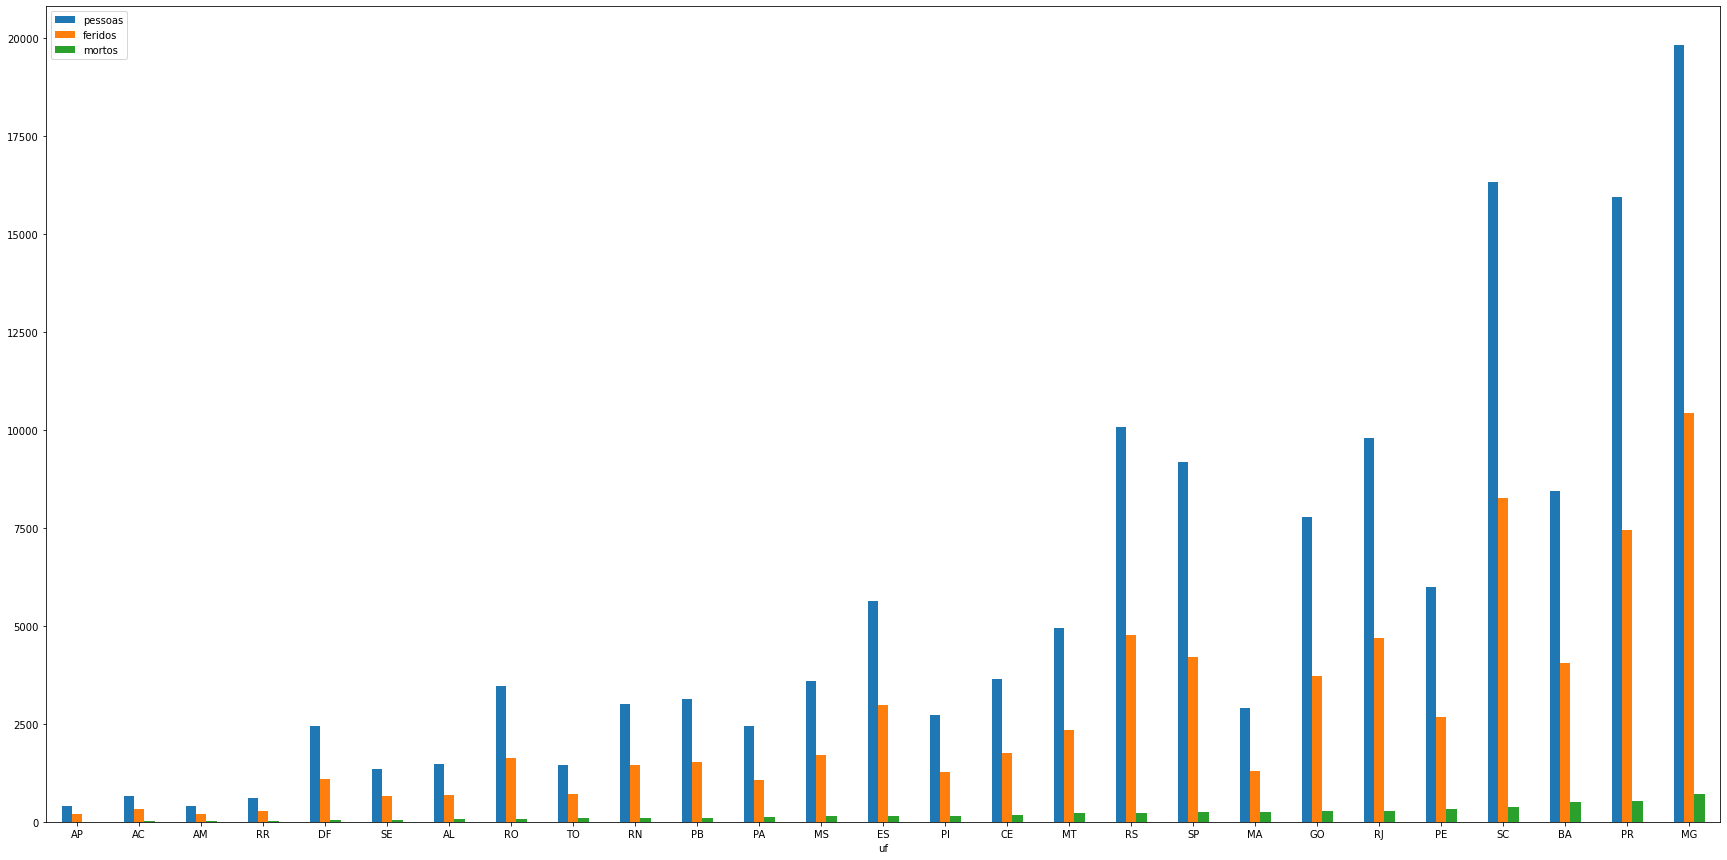

In [50]:
#testes
#base_selecionados['br'].value_counts()
test_result = base_selecionados[['uf', 'pessoas', 'feridos', 'mortos']].groupby('uf').sum()
#type(test_result)
#test_result.sort_values(by='mortos').plot.bar(figsize=(30,15), rot=0)


In [57]:
#testes
#test_result00 = base_selecionados[['causa_acidente']].groupby('causa_acidente').sum()
#test_result00
#base_selecionados.groupby('causa_acidente').sum()
test_result00 = base_selecionados[['causa_acidente', 'pessoas', 'feridos', 'mortos']].groupby('causa_acidente').sum()
test_result00.sort_values(by='mortos', ascending=False)

,pessoas,feridos,mortos
causa_acidente,,,
Falta de Atenção à Condução,51768,25339,1247
Desobediência às normas de trânsito pelo condutor,23389,10688,893
Velocidade Incompatível,12393,7052,710
Falta de Atenção do Pedestre,3865,1435,528
Ingestão de Álcool,11071,4513,336
Ultrapassagem Indevida,3603,1770,318
Condutor Dormindo,4379,2605,251
Defeito Mecânico no Veículo,7271,3377,138
Desobediência às normas de trânsito pelo pedestre,953,318,129


In [20]:
#registros com valores nulos (br e km)
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
result = base_selecionados.loc[base_selecionados['br'].isnull()]
result = result.sort_values(by='uf', ascending=True)
result
#result = result['latitude', 'longitude']
#total_mortes = result['mortos'].sum()
#total_mortes
#lat_long = base_selecionados.loc["latitude", "longitude"]
#mortos_br = mortos_br.sort_values(by='mortos', ascending=False)
#lat_long.head(5)
#result['data_inversa', 'uf']

,id,data_inversa,dia_semana,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,feridos,veiculos,latitude,longitude
19147,282195,2020-04-30,quinta,AC,NaN,NaN,RIO BRANCO,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Feridas,Pleno dia,Sol,Dupla,Reta,Sim,2,0,1,0,1,1,2,"-9,995566","-67,807738"
17256,280048,2020-04-16,quinta,AC,NaN,NaN,RIO BRANCO,Falta de Atenção à Condução,Colisão com objeto estático,Com Vítimas Feridas,Pleno dia,Nublado,Simples,Reta,Não,3,0,1,0,2,1,1,"-10,0131509","-67,7138132"
59834,328154,2020-12-15,terça,AC,NaN,NaN,RIO BRANCO,Restrição de Visibilidade,Colisão transversal,Com Vítimas Feridas,Plena Noite,Céu Claro,Dupla,Não Informado,Sim,3,0,0,1,2,1,2,"-10,01440112","-67,7827174"
53039,320592,2020-11-10,terça,AC,NaN,NaN,RIO BRANCO,Desobediência às normas de trânsito pelo condutor,Colisão lateral,Sem Vítimas,Pleno dia,Céu Claro,Simples,Reta,Sim,2,0,0,0,2,0,2,"-9,97025952","-67,81821728"
30614,295254,2020-07-13,segunda,AM,NaN,NaN,HUMAITA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Sol,Simples,Reta,Não,1,0,1,0,0,1,1,"-7,652233","-63,080819"
63372,344280,2020-12-25,sexta,AM,NaN,NaN,MANAUS,Chuva,Eventos atípicos,Sem Vítimas,Pleno dia,Chuva,Simples,Reta,Não,2,0,0,0,2,0,1,"-2,74313022","-60,01384735"
55456,323303,2020-11-22,domingo,AP,NaN,NaN,PORTO GRANDE,Restrição de Visibilidade,Danos eventuais,Sem Vítimas,Plena Noite,Chuva,Simples,Curva,Sim,3,0,0,0,3,0,1,"0,7137187","-51,41219493"
42294,308269,2020-09-16,quarta,AP,NaN,NaN,MACAPA,Defeito na Via,Danos eventuais,Sem Vítimas,Pleno dia,Céu Claro,Simples,Reta,Sim,3,0,0,0,3,0,1,"0,01750946","-51,06114864"
25596,289575,2020-05-27,quarta,AP,NaN,NaN,MACAPA,Desobediência às normas de trânsito pelo pedestre,Atropelamento de Pedestre,Com Vítimas Feridas,Pleno dia,Céu Claro,Simples,Reta,Sim,5,0,0,1,2,1,1,0,-51
23798,287503,2020-05-31,domingo,BA,NaN,NaN,RIO REAL,Desobediência às normas de trânsito pelo condutor,Colisão com objeto estático,Sem Vítimas,Plena Noite,Céu Claro,Simples,Reta,Não,5,0,0,0,2,0,2,"-11,70657288","-37,91374808"


In [22]:
#Excluindo registros com valores nulos
result_sem_nulos = base_selecionados.dropna(subset=['km'])
cont_nulo = result_sem_nulos.loc[base_selecionados['km'].isnull()].count()
cont_nulo

id                        0
data_inversa              0
dia_semana                0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
pessoas                   0
mortos                    0
feridos_leves             0
feridos_graves            0
ilesos                    0
feridos                   0
veiculos                  0
latitude                  0
longitude                 0
dtype: int64

In [30]:
#para usar a biblioteca geopy, para trazer o endereço a partir da latitude e longitude
#trocar a "," por "."
result['latitude'] = result['latitude'].str.replace(',','.')
result['longitude'] = result['longitude'].str.replace(',','.')
result['longitude']
result

,id,data_inversa,dia_semana,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,feridos,veiculos,latitude,longitude,coordenada,endereco
19147,282195,2020-04-30,quinta,AC,NaN,NaN,RIO BRANCO,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Feridas,Pleno dia,Sol,Dupla,Reta,Sim,2,0,1,0,1,1,2,-9.995566,-67.807738,"-9.995566, -67.807738","(Via Chico Mendes, Rio Branco, Região Geográfi..."
17256,280048,2020-04-16,quinta,AC,NaN,NaN,RIO BRANCO,Falta de Atenção à Condução,Colisão com objeto estático,Com Vítimas Feridas,Pleno dia,Nublado,Simples,Reta,Não,3,0,1,0,2,1,1,-10.0131509,-67.7138132,"-10.0131509, -67.7138132","(Polícia Rodoviária Federal, BR-364, Rio Branc..."
59834,328154,2020-12-15,terça,AC,NaN,NaN,RIO BRANCO,Restrição de Visibilidade,Colisão transversal,Com Vítimas Feridas,Plena Noite,Céu Claro,Dupla,Não Informado,Sim,3,0,0,1,2,1,2,-10.01440112,-67.7827174,"-10.01440112, -67.7827174","(Rua Ciro Fagundo de Almeida, Rio Branco, Regi..."
53039,320592,2020-11-10,terça,AC,NaN,NaN,RIO BRANCO,Desobediência às normas de trânsito pelo condutor,Colisão lateral,Sem Vítimas,Pleno dia,Céu Claro,Simples,Reta,Sim,2,0,0,0,2,0,2,-9.97025952,-67.81821728,"-9.97025952, -67.81821728","(Avenida Ceará, Rio Branco, Região Geográfica ..."
30614,295254,2020-07-13,segunda,AM,NaN,NaN,HUMAITA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Sol,Simples,Reta,Não,1,0,1,0,0,1,1,-7.652233,-63.080819,"-7.652233, -63.080819","(BR-319, Água Boa, Humaitá, Região Geográfica ..."
63372,344280,2020-12-25,sexta,AM,NaN,NaN,MANAUS,Chuva,Eventos atípicos,Sem Vítimas,Pleno dia,Chuva,Simples,Reta,Não,2,0,0,0,2,0,1,-2.74313022,-60.01384735,"-2.74313022, -60.01384735","(Manaus, Região Geográfica Imediata de Manaus,..."
55456,323303,2020-11-22,domingo,AP,NaN,NaN,PORTO GRANDE,Restrição de Visibilidade,Danos eventuais,Sem Vítimas,Plena Noite,Chuva,Simples,Curva,Sim,3,0,0,0,3,0,1,0.7137187,-51.41219493,"0.7137187, -51.41219493","(Rua Primeiro de Dezembro, Porto Grande, Regiã..."
42294,308269,2020-09-16,quarta,AP,NaN,NaN,MACAPA,Defeito na Via,Danos eventuais,Sem Vítimas,Pleno dia,Céu Claro,Simples,Reta,Sim,3,0,0,0,3,0,1,0.01750946,-51.06114864,"0.01750946, -51.06114864","(Super Fácil, Rua Jovino Dinoá, Santa Inês, Ma..."
25596,289575,2020-05-27,quarta,AP,NaN,NaN,MACAPA,Desobediência às normas de trânsito pelo pedestre,Atropelamento de Pedestre,Com Vítimas Feridas,Pleno dia,Céu Claro,Simples,Reta,Sim,5,0,0,1,2,1,1,0,-51,"0, -51","(Região Norte, Brasil, (-4.2112672, -58.650713..."
23798,287503,2020-05-31,domingo,BA,NaN,NaN,RIO REAL,Desobediência às normas de trânsito pelo condutor,Colisão com objeto estático,Sem Vítimas,Plena Noite,Céu Claro,Simples,Reta,Não,5,0,0,0,2,0,2,-11.70657288,-37.91374808,"-11.70657288, -37.91374808","(Rodovia Governador Mário Covas, Esplanada, Re..."


,mortos
br,
116.0,690
101.0,627
153.0,282
381.0,211
316.0,191


In [24]:
#Trazer a latitude e longitude
#geopandas

import geopandas as gpd
gpd.tools.geocode("Rio de Janeiro", provider = "nominatim", user_agent = "Intro Geocode")

,geometry,address
0,POINT (-43.20937 -22.91101),"Rio de Janeiro, Região Geográfica Imediata do ..."


In [28]:
#Geocode Reverso
import shapely.geometry
import geopy

import certifi
import ssl
import geopy.geocoders

In [42]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
coo_lat = result['latitude']
coo_long = result['longitude']
coord = coo_lat + ", " + coo_long
result['coordenada'] = coord

result['endereco'] = result.apply(lambda 
                                  row: geopy.geocoders.Nominatim(user_agent="Intro Geocode").
                                  reverse(row['coordenada']),axis=1)
result['endereco']

19147    (Via Chico Mendes, Rio Branco, Região Geográfi...
17256    (Polícia Rodoviária Federal, BR-364, Rio Branc...
59834    (Rua Ciro Fagundo de Almeida, Rio Branco, Regi...
53039    (Avenida Ceará, Rio Branco, Região Geográfica ...
30614    (BR-319, Água Boa, Humaitá, Região Geográfica ...
63372    (Manaus, Região Geográfica Imediata de Manaus,...
55456    (Rua Primeiro de Dezembro, Porto Grande, Regiã...
42294    (Super Fácil, Rua Jovino Dinoá, Santa Inês, Ma...
25596    (Região Norte, Brasil, (-4.2112672, -58.650713...
23798    (Rodovia Governador Mário Covas, Esplanada, Re...
29443    (Rodovia Engenheiro Vasco Filho, Simões Filho,...
62628    (Fazenda da Raposa, Seabra, Região Geográfica ...
1574     (Porto Seco Pirajá, Jardim Santo Inácio, Salva...
21549    (Avenida Marginal para BR-367, Eunápolis, Regi...
30419    (Rodovia Santos Dumont, Centro, Planalto, Regi...
22501    (Rodovia Engenheiro Vasco Filho, Valéria, Salv...
19017    (Linha Verde, Distrito de Palame, Esplanada, R.

In [46]:
#pegar mes
result['mes'] = result['data_inversa'].dt.month
result['mes']

19147     4
17256     4
59834    12
53039    11
30614     7
63372    12
55456    11
42294     9
25596     5
23798     5
29443     7
62628    12
1574      1
21549     5
30419     7
22501     5
19017     4
63181    12
29524     1
36735     5
42646     9
52527    11
32182     6
55032    11
30879     7
30957     7
35488     8
36181     8
36183     8
43080     9
56848    11
35703     8
35489     7
14098     3
143       1
2153      1
43192     9
25647     6
29947     7
23368     5
2342      1
23034     5
58180    12
46157    10
19135     4
9915      2
3533      1
63003    12
1250      1
62392    12
22428     5
41618     9
18409     4
49075    10
20867     4
22027     5
43913     9
33075     6
47686    10
6295      2
25732     6
36912     8
59355    12
39848     8
54443    11
47203     9
41419     9
35412     8
54784    11
27833     6
40457     9
35603     3
61077    12
41740     3
40517     9
39391     8
38857     8
40621     9
49278    10
48834    10
55957    11
56048    11
58709    12
5892

In [145]:
#result.to_excel("result00.xls")
result.to_csv("result00.csv")

In [50]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
result['endereco'] = result['endereco'].astype(str)

result['nova_br'] = result['endereco'].str.extract('([BR]{2}-\d{3})')
result['nova_br']

19147       NaN
17256    BR-364
59834       NaN
53039       NaN
30614    BR-319
63372       NaN
55456       NaN
42294       NaN
25596       NaN
23798       NaN
29443       NaN
62628       NaN
1574        NaN
21549    BR-367
30419       NaN
22501       NaN
19017       NaN
63181       NaN
29524       NaN
36735       NaN
42646       NaN
52527    BR-080
32182       NaN
55032    BR-153
30879    BR-080
30957       NaN
35488       NaN
36181       NaN
36183       NaN
43080       NaN
56848       NaN
35703    BR-080
35489    BR-080
14098       NaN
143         NaN
2153        NaN
43192       NaN
25647    BR-381
29947       NaN
23368       NaN
2342        NaN
23034       NaN
58180       NaN
46157       NaN
19135       NaN
9915        NaN
3533        NaN
63003       NaN
1250     BR-070
62392       NaN
22428       NaN
41618       NaN
18409    BR-251
49075       NaN
20867       NaN
22027       NaN
43913       NaN
33075       NaN
47686       NaN
6295        NaN
25732       NaN
36912       NaN
59355   

In [52]:
result['nova_br'] = result['nova_br'].str.replace('BR-','')
result['nova_br'].isnull().sum()

135

In [58]:
result.query('municipio == "RIO BRANCO" & uf == "AC"').sum()

id                                                                  1210989
dia_semana                                           quintaquintaterçaterça
uf                                                                 ACACACAC
br                                                                        0
km                                                                        0
municipio                          RIO BRANCORIO BRANCORIO BRANCORIO BRANCO
causa_acidente            Falta de Atenção à ConduçãoFalta de Atenção à ...
tipo_acidente             Colisão lateralColisão com objeto estáticoColi...
classificacao_acidente    Com Vítimas FeridasCom Vítimas FeridasCom Víti...
fase_dia                             Pleno diaPleno diaPlena NoitePleno dia
condicao_metereologica                         SolNubladoCéu ClaroCéu Claro
tipo_pista                                         DuplaSimplesDuplaSimples
tracado_via                                       RetaRetaNão InformadoReta
uso_solo    

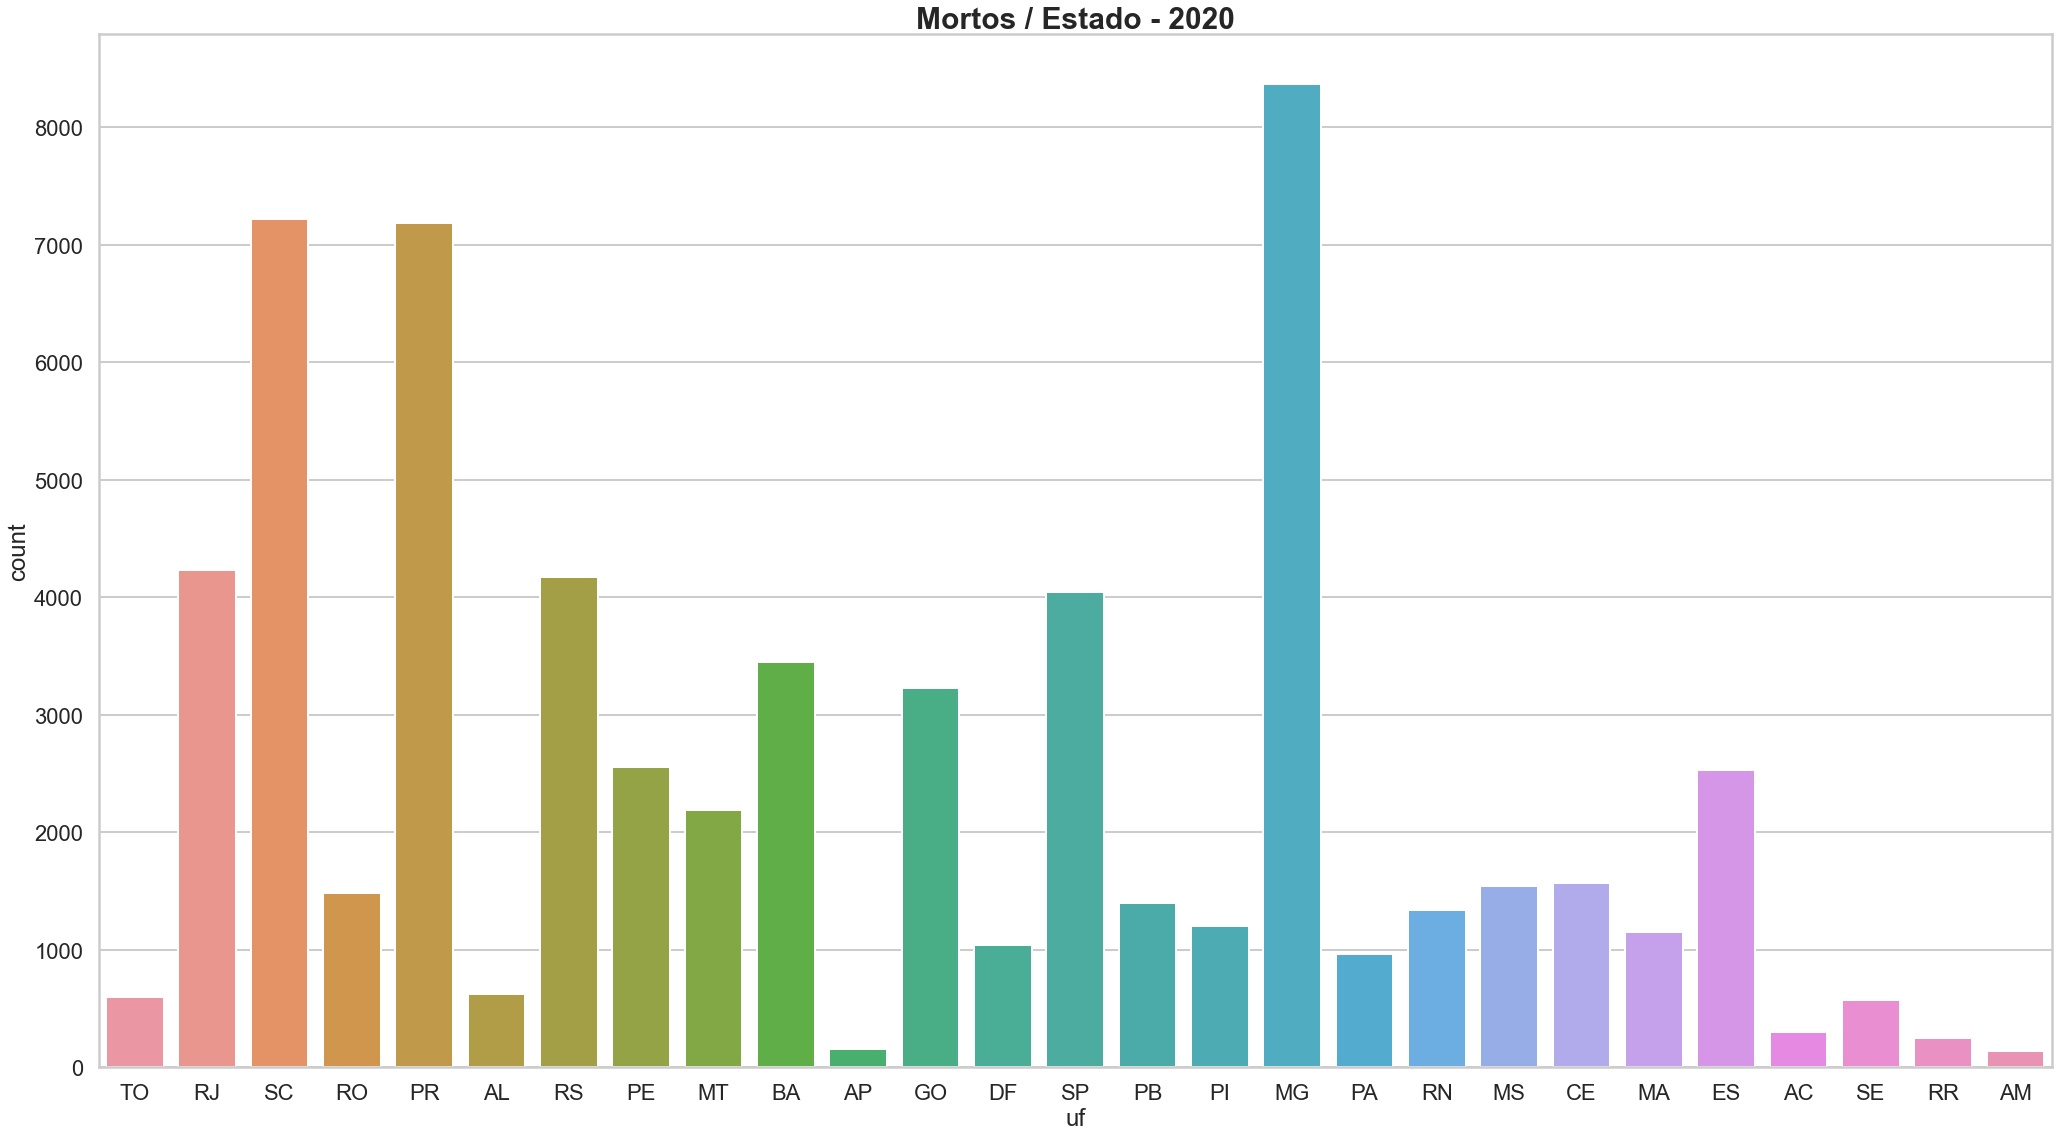

In [44]:
plt.subplots(figsize=(35, 19))
plt.title('Mortos / Estado - 2020', fontsize=30, fontweight='bold')
plt.xlabel('BR') 
plt.ylabel('Mortos')
sns.set_style('whitegrid')
sns.set_context('poster')

sns.countplot(x = base_selecionados['uf']);
#sns.countplot(y = base_selecionados['mortos']);

In [69]:
base_selecionados.dtypes

data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
feridos                     int64
veiculos                    int64
dtype: object

In [ ]:
#valor = result[result['endereco'].astype(str).str.contains('BR-')].count()
#valor
#posicao = result[result['endereco'].apend('BR-')]
#trazer mes

#result.query("feridos == 0")

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
mortos_br = base_selecionados[['br', 'mortos']].groupby('br').sum()
mortos_br = mortos_br.sort_values(by='mortos', ascending=False)
mortos_br.head(5)